In [1]:
import os 
import numpy as np
import tensorflow as tf
path=os.getcwd()
Xtrain =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.).flow_from_directory(f"{path}\\birds\\train\\",target_size=(224,224),shuffle=True)
Xtest =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.).flow_from_directory(f"{path}\\birds\\test\\",target_size=(224,224),shuffle=True)
Xval =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.).flow_from_directory(f"{path}\\birds\\val\\",target_size=(224,224),shuffle=True)

Found 816 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [12]:
input_layer = tf.keras.layers.Input(shape = (224, 224, 3))

max_pool1 = tf.keras.layers.MaxPooling2D(pool_size = (3, 3))
max_pool2 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2))

conv2d1 = tf.keras.layers.Conv2D(8, padding = 'same', kernel_size = (3, 3), activation = 'relu')
batch_norm1 = tf.keras.layers.BatchNormalization()

conv2d2 = tf.keras.layers.Conv2D(8, padding = 'same', kernel_size = (3, 3), activation = 'relu')
batch_norm2 = tf.keras.layers.BatchNormalization()

conv2d3 = tf.keras.layers.Conv2D(16, padding = 'same', kernel_size = (3, 3), activation = 'relu')
batch_norm3 = tf.keras.layers.BatchNormalization()

conv2d4 = tf.keras.layers.Conv2D(16, padding = 'same', kernel_size = (3, 3), activation = 'relu')
batch_norm4 = tf.keras.layers.BatchNormalization()

conv2d5 = tf.keras.layers.Conv2D(32, padding = 'same', kernel_size = (3, 3), activation = 'relu')
batch_norm5 = tf.keras.layers.BatchNormalization()

flatten = tf.keras.layers.Flatten()

dense0 = tf.keras.layers.Dense(1000, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l = 0.01))

predict = tf.keras.layers.Dense(5, activation = 'softmax')

x = input_layer

x = conv2d1(x)
x = max_pool2(x)
x = batch_norm1(x)

x = conv2d2(x)
x = max_pool2(x)
x = batch_norm2(x)

x = conv2d3(x)
x = max_pool2(x)
x = batch_norm3(x)

x = conv2d4(x)
x = max_pool2(x)
x = batch_norm4(x)

x = conv2d5(x)
x = max_pool1(x)
x = batch_norm5(x)

x = flatten(x)

x = tf.keras.layers.Dropout(.2)(x)

x = dense0(x)

model = tf.keras.Model(input_layer, predict(x))
model.summary()

model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits = False),
    metrics = 'categorical_accuracy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
)

history = model.fit(Xtrain, epochs=20, 
                    validation_data=(Xval))
#model kaydetme
model.save("Mymodel.h5")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 8)  224         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  multiple            0           ['conv2d[0][0]',                 
                                                                  'conv2d_1[0][0]',               
                                                                  'conv2d_2[0][0]',           

In [2]:
#kaydedilmiş modeli yükleme
import tensorflow
model1=tensorflow.keras.models.load_model("Mymodel.h5")

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history["categorical_accuracy"])
plt.plot(history.history["val_categorical_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model/accuracy loss")
plt.ylabel("Accuracy/loss")
plt.xlabel("epoch")
plt.legend(["Train acc","Val acc","Train loss","Val loss"],loc="center right")
plt.show()

NameError: name 'history' is not defined

In [6]:
import numpy as np
ytest=[]
for i in range(len(Xtest)):ytest.extend([np.argmax(Xtest[i][1],axis=1)][0])
ytest=np.asarray(ytest)

1/1 [==============================] - 0s 71ms/step
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.20      0.33         5
           2       1.00      1.00      1.00         5
           3       0.75      0.60      0.67         5
           4       1.00      0.60      0.75         5

    accuracy                           0.68        25
   macro avg       0.83      0.68      0.67        25
weighted avg       0.83      0.68      0.67        25



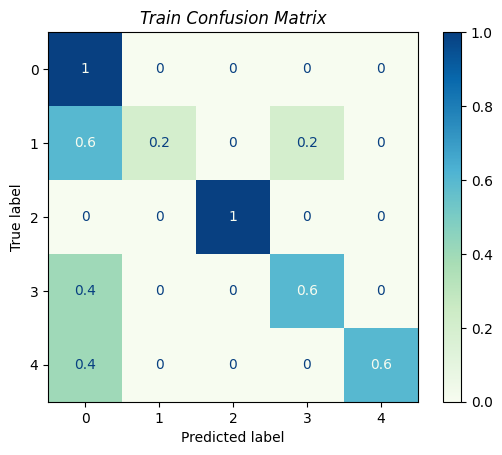

In [7]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
ytestpred=model1.predict(Xtest)
ytestpred=np.argmax(ytestpred,axis=1)
ytest=np.asarray(ytest)
print(classification_report(ytest,ytestpred))
cm = confusion_matrix(ytest,ytestpred,normalize = "true").round(2)
#cmn=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
#cmn=cmn.round(2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format = "g")
plt.title(f"Train Confusion Matrix",style ="italic")
#plt.savefig(f"Model2_CM_8901_{self.header}_Data_Son.jpg")
plt.show()

In [10]:
import h5py
#hocanın son attığı model
input_layer = tf.keras.layers.Input(shape = (224, 224, 3))

max_pool1 = tf.keras.layers.MaxPooling2D(pool_size = (3, 3))
max_pool2 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2))

conv2d1 = tf.keras.layers.Conv2D(8, padding = 'same', kernel_size = (3, 3), activation = 'relu')
batch_norm1 = tf.keras.layers.BatchNormalization()

conv2d2 = tf.keras.layers.Conv2D(8, padding = 'same', kernel_size = (3, 3), activation = 'relu')
batch_norm2 = tf.keras.layers.BatchNormalization()

conv2d3 = tf.keras.layers.Conv2D(16, padding = 'same', kernel_size = (3, 3), activation = 'relu')
batch_norm3 = tf.keras.layers.BatchNormalization()

conv2d4 = tf.keras.layers.Conv2D(16, padding = 'same', kernel_size = (3, 3), activation = 'relu')
batch_norm4 = tf.keras.layers.BatchNormalization()

conv2d5 = tf.keras.layers.Conv2D(32, padding = 'same', kernel_size = (3, 3), activation = 'relu')
batch_norm5 = tf.keras.layers.BatchNormalization()

flatten = tf.keras.layers.Flatten()

dense0 = tf.keras.layers.Dense(500, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l = 0.01))

predict = tf.keras.layers.Dense(5, activation = 'softmax')

x = input_layer

x = conv2d1(x)
x = max_pool2(x)
x = batch_norm1(x)

x = conv2d2(x)
x = max_pool2(x)
x = batch_norm2(x)

x = conv2d3(x)
x = max_pool2(x)
x = batch_norm3(x)

x = conv2d4(x)
x = max_pool2(x)
x = batch_norm4(x)

x = conv2d5(x)
x = max_pool1(x)
x = batch_norm5(x)

x = flatten(x)

x = tf.keras.layers.Dropout(.2)(x)

x = dense0(x)

model = tf.keras.Model(input_layer, predict(x))
model.summary()

model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits = False),
    metrics = 'categorical_accuracy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
)

history = model.fit(Xtrain, epochs=50, 
                    validation_data=(Xval))

model.save("Mymodel.h5")

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 224, 224, 8)  224         ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_7 (MaxPooling2D)  multiple            0           ['conv2d_15[0][0]',              
                                                                  'conv2d_16[0][0]',              
                                                                  'conv2d_17[0][0]',        

KeyboardInterrupt: 